In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('drive/MyDrive/IITM/MLP/datasets/DataPreprocessingGraded_dataset.csv')
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Target'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [7]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [9]:
data.replace({'?': np.nan}, inplace=True)

In [10]:
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [30]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
V1,743,31,2.0,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,743,32,1.0,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,748.0,NaN,NaN,NaN,1378.676471,1459.826781,250.0,500.0,1000.0,1750.0,12500.0
V4,748.0,NaN,NaN,NaN,34.282086,24.376714,2.0,16.0,28.0,50.0,98.0
V5,748,1,NEGATIVE,748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,748,2,NO,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data2 = data.replace({'POSITIVE': 1, 'NEGATIVE': 0, 'YES': 1, 'NO': 0})
data_stdized = sc.fit(data2)
data_stdized.var_

array([6.54170119e+01, 3.35919312e+01, 2.12824517e+06, 5.93429786e+02,
       0.00000000e+00, 1.81339186e-01])

In [49]:
v1 = data_stdized.var_[0]
v2 = data_stdized.var_[1]
v3 = data_stdized.var_[2]
v4 = data_stdized.var_[3]
v1, v2, v3, v4
# v2 has least variance

(65.41701189568319, 33.59193115103913, 2128245.1734035863, 593.4297860247648)

In [58]:
data.iloc[:, :2]

,V1,V2
0,2.0,50.0
1,0.0,13.0
2,NaN,NaN
3,NaN,20.0
4,1.0,24.0
...,...,...
743,23.0,2.0
744,21.0,2.0
745,23.0,3.0
746,39.0,1.0


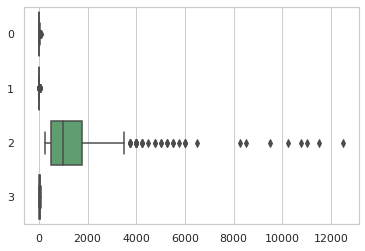

In [62]:
# Box plot of first 4 variables (indexed from 0)
data_for_plot = np.array(data.iloc[:, :4])
sns.boxplot(data=data_for_plot, orient='h')

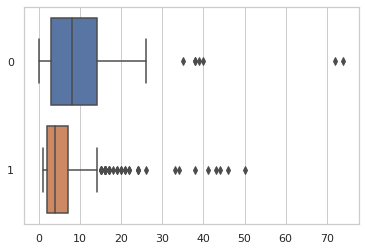

In [63]:
# Box plot of first 2 variables (indexed from 0)
data_for_plot = np.array(data.iloc[:, :2])
sns.boxplot(data=data_for_plot, orient='h')

From the two box plots above, it is clear that V1 has least outliers

In [13]:
data.Target.value_counts()

NO     570
YES    178
Name: Target, dtype: int64

In [14]:
data.isnull().sum()

V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
X = np.array(data.V1).reshape(-1,1)
X_si = si.fit_transform(X)
X_si.mean(axis=0)

array([9.55213904])

In [27]:
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=3)
X = np.array(data.V1).reshape(-1,1)
X_knni = knni.fit_transform(X)
X_knni.mean(axis=0)

array([9.56258412])

In [28]:
from sklearn.impute import SimpleImputer
si2 = SimpleImputer(strategy='mean')
X = np.array(data.V2).reshape(-1,1)
X_si2 = si2.fit_transform(X)
X_si2.mean(axis=0)

array([5.46433378])